In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("housing.csv")

In [3]:
#Exploring the dataset

data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
#Data Preprocessing

#Remove null values
data.dropna(inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [7]:
#Split the data into training and testing

from sklearn.model_selection import train_test_split

#dataframe without the target variable
x = data.drop(['median_house_value'], axis =1)   

#dataframe including only the target variable
y = data['median_house_value']   

In [8]:
#Training and testing x,y are defined based on a split (only 20% of the records are going to be used for testing)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [9]:
train_data = x_train.join(y_train)

In [10]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
14244,-117.10,32.70,28.0,633.0,137.0,525.0,170.0,3.6042,NEAR OCEAN,95600.0
12102,-117.31,33.94,7.0,11232.0,1791.0,4218.0,1644.0,5.2713,INLAND,216500.0
12150,-117.19,33.70,24.0,5783.0,1256.0,1990.0,1151.0,1.9014,<1H OCEAN,83500.0
5060,-118.35,34.00,28.0,3085.0,621.0,1162.0,558.0,3.2500,<1H OCEAN,301000.0
10693,-117.73,33.61,16.0,590.0,130.0,178.0,121.0,4.8611,<1H OCEAN,186800.0
...,...,...,...,...,...,...,...,...,...,...
20282,-119.18,34.19,36.0,4519.0,1081.0,4818.0,1061.0,2.8561,NEAR OCEAN,179100.0
1053,-121.83,39.76,12.0,9831.0,1921.0,4644.0,1775.0,3.1142,INLAND,112600.0
19521,-120.99,37.64,50.0,683.0,189.0,459.0,195.0,1.8162,INLAND,70000.0
6637,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,<1H OCEAN,153500.0


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

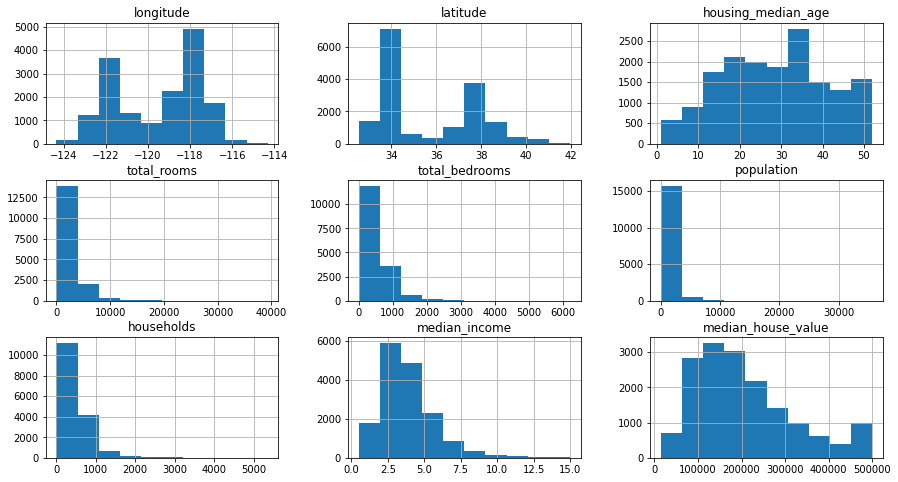

In [11]:
train_data.hist(figsize=(15,8))

<AxesSubplot:>

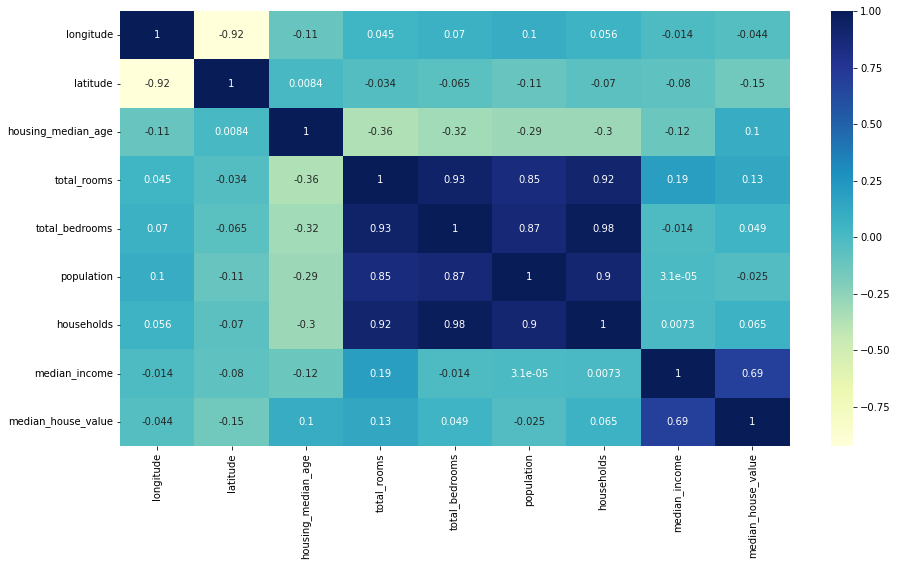

In [12]:
#Correlation between all the variables

plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

In [13]:
#Data was skewed in some columns, so a natural logarithm can be useful to make it more symmetric

train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

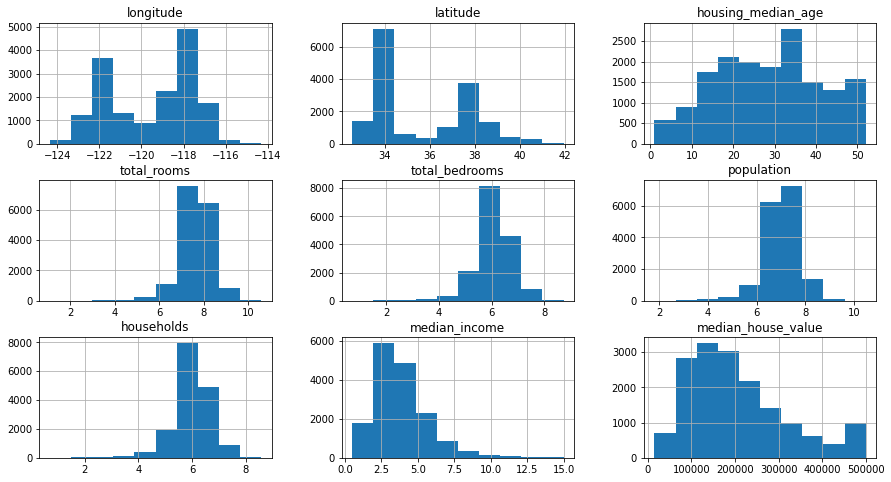

In [14]:
train_data.hist(figsize=(15,8))

In [15]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     7281
INLAND        5158
NEAR OCEAN    2072
NEAR BAY      1831
ISLAND           4
Name: ocean_proximity, dtype: int64

In [19]:
#Feature Engineering

#Converting categorical variables to numerical using one-hot encoding

train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

<AxesSubplot:>

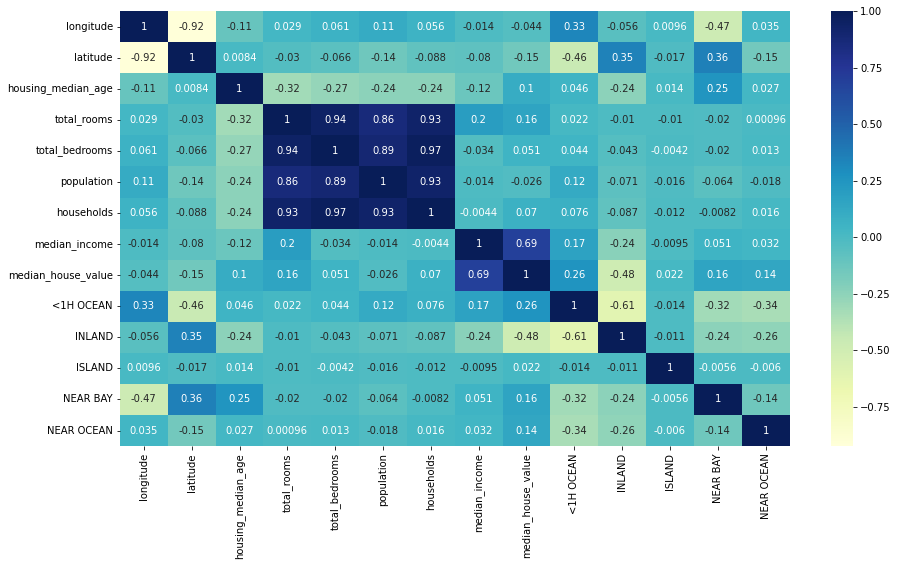

In [21]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

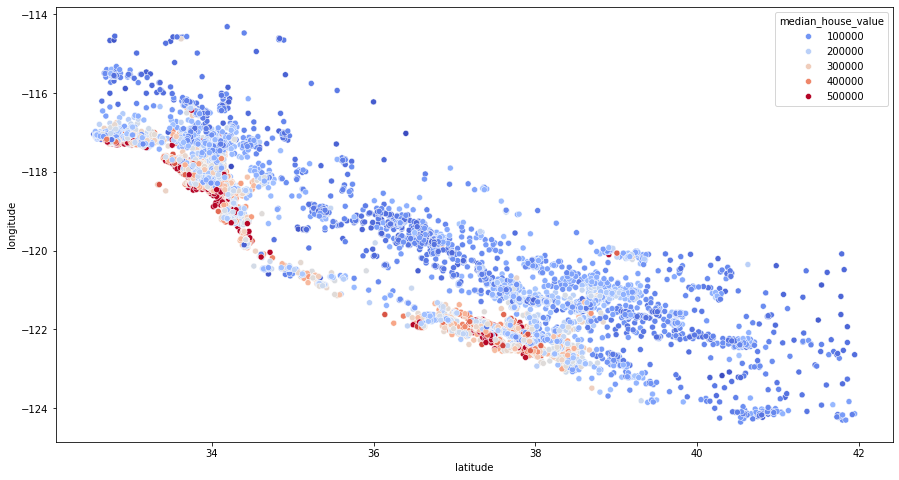

In [22]:
#Plotting a chart to identify whether price of a house is impacted by its location

plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude',y='longitude',data=train_data,hue='median_house_value',palette='coolwarm')

In [24]:
#Creating two new variables bedroom_ratio and household_rooms

train_data['bedroom_ratio'] = train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms']/train_data['households']

<AxesSubplot:>

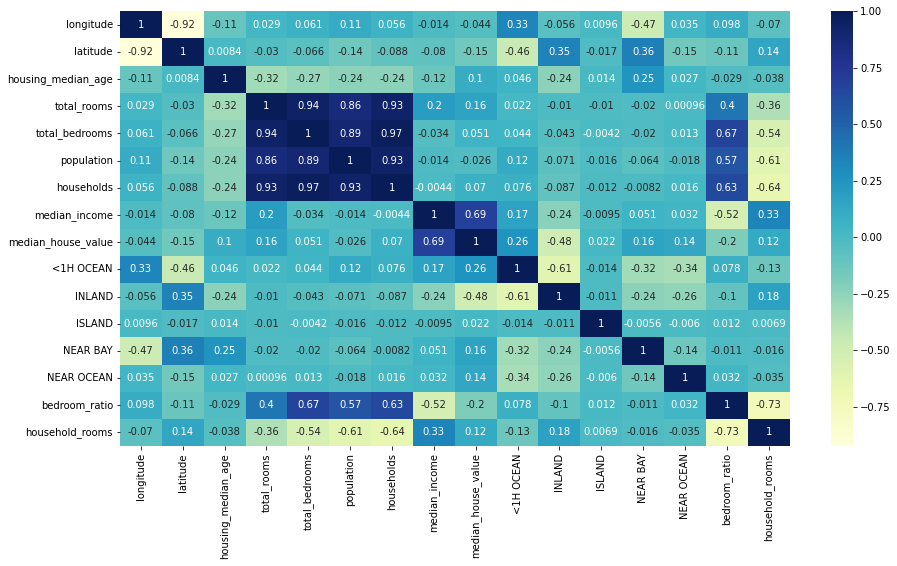

In [25]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

In [37]:
#Linear Regression Model

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

#Standardizing the features
scaler = StandardScaler()

x_train,y_train = train_data.drop(['median_house_value'],axis=1),train_data['median_house_value']
x_train_s = scaler.fit_transform(x_train)

reg = LinearRegression()

reg.fit(x_train,y_train)

LinearRegression()

In [34]:
test_data = x_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms']/test_data['households']

x_test,y_test = test_data.drop(['median_house_value'],axis=1),test_data['median_house_value']

In [38]:
x_test_s = scaler.transform(x_test)

In [35]:
reg.score(x_test,y_test)

0.6976666874377861

In [42]:
#Random Forest Model

from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(x_train,y_train)

RandomForestRegressor()

In [44]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [3,10,30],
    "max_features": [2,4,6,8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score=True)

grid_search.fit(x_train_s,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [46]:
best_forest = grid_search.best_estimator_

In [47]:
best_forest.score(x_test_s,y_test)

0.7350407264856422